# Import Libraries & Dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/youronlydimwit/Data_ScienceUse_Cases/refs/heads/main/Clustering/Data/Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Quick Check Ups

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


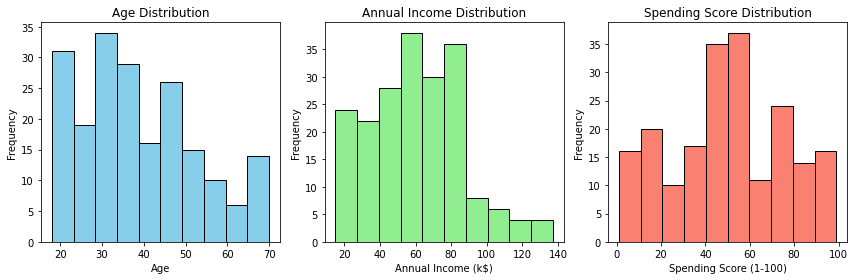

In [4]:
# Create a 3x1 grid for the histograms
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Plot histogram for Age
axs[0].hist(df['Age'], bins=10, color='skyblue', edgecolor='black')
axs[0].set_title('Age Distribution')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Plot histogram for Annual Income (k$)
axs[1].hist(df['Annual Income (k$)'], bins=10, color='lightgreen', edgecolor='black')
axs[1].set_title('Annual Income Distribution')
axs[1].set_xlabel('Annual Income (k$)')
axs[1].set_ylabel('Frequency')

# Plot histogram for Spending Score (1-100)
axs[2].hist(df['Spending Score (1-100)'], bins=10, color='salmon', edgecolor='black')
axs[2].set_title('Spending Score Distribution')
axs[2].set_xlabel('Spending Score (1-100)')
axs[2].set_ylabel('Frequency')

# Adjust layout to avoid overlap
plt.tight_layout()

# Show the plots
plt.show()

# Pre-Clustering
We will feed the data into kmeans and select how many clusters works best based on the **Elbow method**.

C:\Users\sang.yogi\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


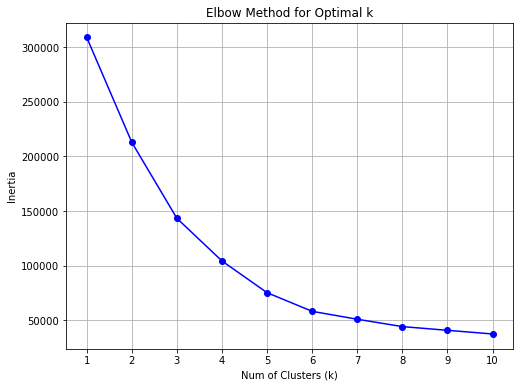

In [5]:
# Select the relevant columns for clustering (excluding 'CustomerID' and 'Genre')
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# List to store the sum of squared distances (inertia)
inertia = []

# Run K-Means for cluster sizes from 1 to 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=0).fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Num of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(range(1, 11))  # Ensure all k-values are shown
plt.grid(True)
plt.show()

# Running the Kmeans Clustering

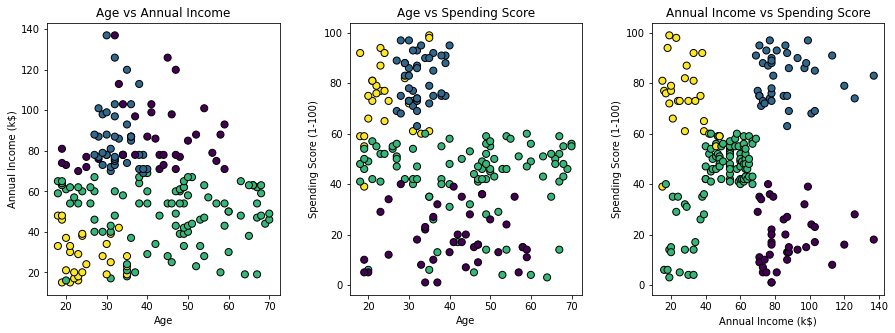

In [6]:
# Apply KMeans clustering with chosen amount of clusters
clust = 4
kmeans = KMeans(n_clusters=clust, random_state=0)
kmeans.fit(X)

# Get cluster labels and centers
labels = kmeans.labels_

# Add the cluster labels to the original dataframe
df['Cluster'] = labels

# Create a 3x1 grid for scatter plots
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Scatter plot for Age vs Annual Income
axs[0].scatter(df['Age'], df['Annual Income (k$)'], c=labels, s=50, cmap='viridis', edgecolor='black')
axs[0].set_title('Age vs Annual Income')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Annual Income (k$)')

# Scatter plot for Age vs Spending Score
axs[1].scatter(df['Age'], df['Spending Score (1-100)'], c=labels, s=50, cmap='viridis', edgecolor='black')
axs[1].set_title('Age vs Spending Score')
axs[1].set_xlabel('Age')
axs[1].set_ylabel('Spending Score (1-100)')

# Scatter plot for Annual Income vs Spending Score
axs[2].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c=labels, s=50, cmap='viridis', edgecolor='black')
axs[2].set_title('Annual Income vs Spending Score')
axs[2].set_xlabel('Annual Income (k$)')
axs[2].set_ylabel('Spending Score (1-100)')

# Adjust layout
plt.subplots_adjust(wspace=0.3)

# Show the plots
plt.show()

# Checking & Interpretation

In [7]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

# Assuming 'X' is your feature set and 'labels' is the array of cluster labels
silhouette_avg, db_index, ch_index = (
    silhouette_score(X, labels), 
    davies_bouldin_score(X, labels), 
    calinski_harabasz_score(X, labels)
)

print(f'Silhouette Score: {silhouette_avg}')
print(f'Davies-Bouldin Index: {db_index}')
print(f'Calinski-Harabasz Index: {ch_index}')

Silhouette Score: 0.40546302077733304
Davies-Bouldin Index: 0.8914904209843165
Calinski-Harabasz Index: 127.9838294818919


**Silhouette Score:**
- This indicates that, on average, the samples are reasonably well-clustered, but there might still be some overlap between clusters.

**Davies-Bouldin Index:**
- The index is relatively low, suggesting that the clusters are distinct from each other. 

**Calinski-Harabasz Index:**
- The clusters are well-separated and compact. It indicates a good clustering structure, where the clusters are distinct from each other while remaining tightly packed.